# Math 351 Assignment 4


# Problem 1 - Newton interpolation and the Runge phenomenon


(a) Write a function which computes, and returns, the interpolation polynomial.

Input:  
* x=[x0,...,xn]:  a list of x coordinates
* y=[y0....,yn]: a list of y coordiantes
 
Output:
* a list a=[a0...a_n] representing the interpolation coefficients in nested form.

(b) Write a function which evaluates polynomials in nested form.

Input: 
* x=[x0,...,xn]:  a list of x coordinates
* a=[a0....,an]: a list of interpolation coefficients such as was computed in (a)

Output: the number $p(t)$ given by
$$p(t) = a_0 + (t-x_0)(a_1 + (t-x_1)(a_2 +  (t-x_2)(a_3 + (t-x_3)(a_4 +  \ldots )))))).$$

I suspect, but am not entirely sure, that this can be done very cleverly using python's reduce statement.  I'd write a loop, myself.

(c) Using parts (a) and (b), reproduce Figure 4.7 (p.155) of the text, showing the Runge phenomenon.  That is, you're going to interpolate the runge function $$f(x) = \frac{1}{1+x^2}$$ and you're going to interpolate at 9 equally spaced points in the interval [-5,5]; provide a graph which overlays the runge function, the interpolation polynomial you compute, and a scatter plot of the interpolation nodes $(x_i, y_i)$.

(d) Using parts (a) and (b), and also the problem from Assignment 3 in which we found the roots of the Chebyshev Polynomials, reproduce figure 4.8 in the text.

In [180]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from sympy.abc import t

class node:
    yval = 0
    xmin = 0 
    xmax = 0

def interpolate(xs, ys):
    alist = []
    diffs = []
    nodes = []
    
    for k in range(len(xs)):
        ntemp = node()
        ntemp.xmin = xs[k]
        ntemp.xmax = xs[k]
        ntemp.yval = ys[k]
        nodes.append(ntemp)
        
    while(nodes):
        alist.append(nodes[0].yval)
        for i in range(len(nodes)-1):
            diffs.append(divdiff(nodes[i], nodes[i+1]))
        nodes = diffs
        diffs = []
    return alist
            
def divdiff(n1, n2):
    newnode = node()
    newnode.yval = (n2.yval - n1.yval)/(n2.xmax - n1.xmin)
    newnode.xmax = n2.xmax
    newnode.xmin = n1.xmin
    return newnode

def evalinter(xs, alist):
    expr = 0
    for i in reversed(range(len(alist))):
        expr = alist[i] + expr * (t - xs[i])
    return expr

xs = [1, 2, 5]
ys = [2, 3, 1]
print("Part A:", interpolate(xs, ys))
print("Part B:", evalinter(xs, interpolate(xs, ys)))

Part A: [2, 1.0, -0.41666666666666663]
Part B: (1.83333333333333 - 0.416666666666667*t)*(t - 1) + 2


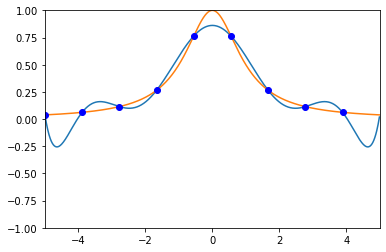

In [181]:
class node:
    yval = 0
    xmin = 0 
    xmax = 0

def evalinter(xs, alist):
    expr = 0
    for i in reversed(range(len(alist))):
        expr = alist[i] + expr * (x - xs[i])
    return expr

eqxs = []
eqys = []
n = 9
for i in range(n):
    eqxs.append(-5 + (10/n)*i)
    eqys.append(1/(eqxs[i]**2 + 1))
aplots = interpolate(eqxs, eqys)
x = np.arange(-5, 5, 0.01)
y = evalinter(eqxs, aplots)
plt.plot(x, y)
plt.plot(x, 1/(x**2 + 1))
plt.plot(eqxs, eqys, 'bo')
plt.axis([-5, 5, -1, 1])
plt.show()

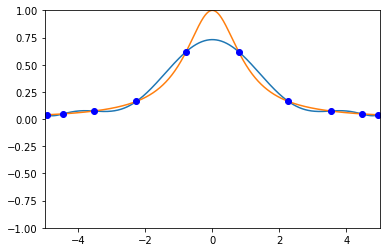

In [182]:
import numpy as np
import sympy as sy
from sympy import degree, Symbol
from sympy.abc import x, y
from matplotlib import pyplot as plt

def interlace(f):
    if(degree(f) == 1):
        return [bisect(-1, 1, f)]
    else:
        temp = []
        prev = -1
        fprime = sy.diff(f, x)
        for a in interlace(fprime):
            temp.append(bisect(prev, a, f))
            prev = a
        temp.append(bisect(prev, 1, f))
    return temp
        
def bisect(a, b, exp):
    for i in range(1, 24):
        c = (a+b)/2
        fc = exp.evalf(subs={x:c})
        if np.abs(fc) < 1*10**-5:
            return c
        if fc < 0:
            if exp.evalf(subs={x:a}) <= 0:
                a = c
            else:
                b = c
        else:
            if exp.evalf(subs={x:a}) > 0:
                a = c
            else:
                b = c
    return c

def buildPoly(n, exp):
    if(n == 0):
        return 1
    elif(n == 1):
        return x
    else:
        exp = 2*x*buildPoly(n-1, exp) - buildPoly(n-2, exp)
    return exp

x = Symbol('x')
exp = -5*sy.cos(((2*x+1)/20) * np.pi)
chebyxs = []
chebyys = []
for i in range(10):
    chebyxs.append(exp.evalf(subs={x:i}))
    chebyys.append(1/(chebyxs[i]**2 + 1))

x = np.arange(-5, 5, 0.01)
chebyas = interpolate(chebyxs, chebyys)
chebyinter = evalinter(chebyxs, chebyas)
plt.plot(x, chebyinter)
plt.plot(x, 1/(x**2 + 1))
plt.axis([-5, 5, -1, 1])
plt.plot(chebyxs, chebyys, 'bo')
plt.show()

# Problem 2 - Bivariate interpolation




Find a polynomial $f(x,y)$ which is degree 2 in $x$ and also degree 2 in $y$, such that the graph of $f(x,y)$ passes through the 9 points
	\begin{align*}
		(0, 0, -1), && (0, 1, -2), && (0, 2, -5), \\
		(1, 0, 2), && (1, 1, 0), && (1, 2, -4), \\
		(2, 0, 7), && (2, 1, 4), && (2, 2, -1).
	\end{align*}
The text describes an awful way to do this on Page 144 - basically the 2-variable Lagrange polynomial. It's got like 9 terms, each of which is a quadratic in x and y.  You're welcome to do it this way if you want, but it's going to be a pain to simplify it.  

Here's a better way which only uses ordinary, single-variable fitting. Do the following using some combination of SymPy, your work for Problem 1, and ordinary, by-hand algebra.

(a) Discard the $x$ coordinate from the first 3 points, yielding three points $(y,z)$: $( 0, -1)$, $(1, -2)$, $(2, -5).$  Now fit a quadratic in $y$ to these points.  This quadratic would have to be $f(0, y)$.  Find quadratics $f(1,y)$ and $f(2,y)$ similarly.

(b) Now, we're expecting the $y^2$ coefficient of $f(x,y)$ to be some polynomial $g(x)$; moreover, part (a) has basically just asked us to compute $g(1), g(2), g(3)$.  Find $g$ by fitting a polynomial in $x$ to these numbers.   Do something similar to find a polynomial $h(x)$ that represent the $y$ coefficient of $f(x,y)$, and a polynomial $k(x)$ which represents the "y-constant" coefficient of $f(x,y)$.

(c) Put parts (a) and (b) together by computing $f(x,y) = g(x)y^2 + h(x)y + k(x)$.  Now you've found $f$!  Neat.  Check that $f$ has the correct values at the nine points above.


In [183]:
import numpy as np
import sympy as sy
from sympy.abc import x, y

def evalinter(vals, alist, sym):
    expr = 0
    for i in reversed(range(len(alist))):
        expr = alist[i] + expr * (sym - vals[i])
    return expr

xvals = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
yvals = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
zvals = np.array([-1, -2, -5, 2, 0, -4, 7, 4, -1])
f0ya = interpolate(yvals[0:3], zvals[0:3])
f1ya = interpolate(yvals[3:6], zvals[3:6])
f2ya = interpolate(yvals[6:9], zvals[6:9])

print("f(0, y) a values:", f0ya)
print("f(1, y) a values:", f1ya)
print("f(2, y) a values:", f2ya, '\n')

f0 = evalinter(yvals[0:3], f0ya, y)
f1 = evalinter(yvals[3:6], f1ya, y)
f2 = evalinter(yvals[6:9], f2ya, y)

print("f(0) =", f0) # -y^2 - 1 
print("f(1) =", f1) # -y^2 - y + 2
print("f(2) =", f2, '\n') # -y^2 -2y + 7

# h(x) is easily derived from the coefficients on y in the above polynomials
# Similarly, we see that g(x) is a constant -1
gx = -1
hx = -x
print("g(x) = -1")
print("h(x) = -x")

kxa = interpolate(yvals[0:3], [-1, 2, 7])
kx = evalinter(yvals[0:3], kxa, x)
print("k(x) =", kx, '\n')

fxy = gx*y**2 + hx*y + kx
print("f(x, y) =", fxy)
print("Checking values:")
for i in range(9):
    print(fxy.evalf(subs={x:xvals[i], y:yvals[i]}) - zvals[i] < 1e-23) # Has trouble reaching true 0, check error instead.

f(0, y) a values: [-1, -1.0, -1.0]
f(1, y) a values: [2, -2.0, -1.0]
f(2, y) a values: [7, -3.0, -1.0] 

f(0) = -1.0*y**2 - 1
f(1) = y*(-1.0*y - 1.0) + 2
f(2) = y*(-1.0*y - 2.0) + 7 

g(x) = -1
h(x) = -x
k(x) = x*(1.0*x + 2.0) - 1 

f(x, y) = -x*y + x*(1.0*x + 2.0) - y**2 - 1
Checking values:
True
True
True
True
True
True
True
True
True


# Problem 3 - Richardson Extrapolation

In this problem, we're going to investigate how to best to choose the parameters $N$ and $h$ in the Richardson extrapolation algorithm.

(a) Implement Richardson Extrapolation as described in Algorithm 4.2 in the text.  Leave $\phi, N, h$ as parameters, and return the entire triangular table of numbers $D(i,j)$ (even though generally you would only use $D(N,N)$, that being the most exact value.  If you like, you can try using Sympy's built-in richardson extrapolation function to test your work (though I myself have not done this).

(b) Use your results of (a) to compute the derivative of $\tan(x)$ numerically at some randomly chosen points in $[0,1]$.  At some point, using higher values of $N$ and/or smaller values of $h$, won't give you more accurate answers due to floating-point effects. Compare with the value of $\sec^2(x)$ at those points, which is the true, exact derivative.    

(c) Continuing your work in (b), figure out the a range of $h$ values which are sensible for use in Richardson extrapolation, and for each, find the *best* choice of $N$ for each value of $h$.  Then, time the algorithm using these parameters, and plot a graph of the running time.  What is the fastest choice of $N$ and $h$?    

In [186]:
x = 0.5454545
trueval = 1/(np.cos(x)**2)

def richexp(func, N, h):
    D = [[0]*N for k in range(N)]
    D[0][0] = phi(func, h)
    
    for i in range(N):
        D[i][0] = phi(func, h/(2**i))
        for j in range(1, i+1):
            D[i][j] = D[i][j-1]+(D[i][j-1] - D[i-1][j-1])/(4**j - 1)
    return D

def phi(func, h):
    return (1/(2*h))*(func(x+h) - func(x-h))

mindiff = np.inf
bestN = -1
for h in [10, 5, 1, 0.5, 0.25, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]:
    for n in range(1, 20):
        currdiff = richexp(np.tan, n, h)[n-1][n-1] - trueval
        if(abs(currdiff) < abs(mindiff)):
            mindiff = currdiff
            bestN = n
    print("h =", h, "  \thas a best error of", mindiff, "\twhen N =", bestN)
    mindiff = np.inf
    
# Part A: Returning the entire triangle of D(i, j) values
val = 0.985
N = 13
print('Richard extrapolation values for D(N, N):', richexp(np.tan, N, val), '\n')
print('True value:', trueval)

# Part C:
# We see that the smallest errors are generated when h is relatively large (h~1), and that it's drastically more accurate
# when we start around h = 1 and run Richardson's many times compared to starting with smaller values of h.
# Due to the wild inaccuracies of small h, we can clearly see that the fastest & most accurate combination occurs when
# h = 0.1 and N = 5. (It possesses the least # of Richardson extrapolations while producing e-15 error bound).

h = 10   	has a best error of 1.5543122344752192e-15 	when N = 11
h = 5   	has a best error of 1.5543122344752192e-15 	when N = 10
h = 1   	has a best error of 3.1086244689504383e-15 	when N = 11
h = 0.5   	has a best error of 3.1086244689504383e-15 	when N = 10
h = 0.25   	has a best error of 3.1086244689504383e-15 	when N = 9
h = 0.1   	has a best error of -2.4424906541753444e-15 	when N = 5
h = 0.01   	has a best error of 1.2656542480726785e-14 	when N = 5
h = 0.001   	has a best error of -2.90878432451791e-14 	when N = 3
h = 0.0001   	has a best error of 6.148415110374117e-13 	when N = 2
h = 1e-05   	has a best error of -3.8262726320681395e-12 	when N = 3
h = 1e-06   	has a best error of 4.243316809038333e-11 	when N = 1
h = 1e-07   	has a best error of -5.681894954534528e-10 	when N = 1
h = 1e-08   	has a best error of 1.282182360284878e-09 	when N = 3
h = 1e-09   	has a best error of -5.9410010022631354e-08 	when N = 1
h = 1e-10   	has a best error of 1.0712344389318673e-07 	when

# Problem 4 - The interpolation error formula for equally spaced points

Let's see if Theorem 2 in section 4.2 gives a useful bound on the interpolation error for regularly spaced nodes.

This formula gives a bound on the error of an interpolation polynomial, in terms of the interpolation nodes $x_i (0 \leq i \leq n)$.  We're going to use the Runge function $$f(x) = \frac{1}{1+x^2}$$and we're going to take $x_i$ $(0 \leq i \leq 8)$to be nine equally spaced points over the interval $[-5,5]$.

(a)  Recall that in theorem 2, $M$ is meant to be an upper bound for  $|f^{(10)}(x)|$ for all points $x \in [-5,5]$.  Using sympy, find the smallest such value of $M$ that you can.

(b) Improve your graph from problem 1(c) by including a shaded region on the graph, which shows the error bound from Theorem 2.  You can use the fill_between option of pyplot to make lovely pictures of this, thusly:


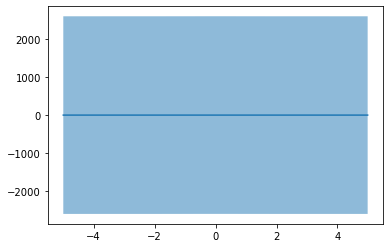

In [187]:
import matplotlib.pyplot as plt
from sympy.abc import x, y

xfield = np.arange(-5, 5, 0.01)
x = sy.Symbol('x')
y = (1 + x**2)**-1 # Set y for derivation
yprime = sy.diff(y, x, 9)

currmax = 10000

for i in xfield:
    if abs(yprime.evalf(subs={x:i})) > currmax:
        currmin = abs(yprime.evalf(subs={x:i}))
M = currmax
h = 1.25
n = 8
error = (float)(M/(4*(n+1))) * h**10

y = (1 + xfield**2)**-1
plt.plot(xfield, y)
plt.fill_between(xfield, y-error, y+error, alpha=0.5)
plt.show()